In [13]:
import requests
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt

In [2]:
try:
    IEX_CLOUD_API_TOKEN = open('iexcloud_apikey.txt').read()
    print("read file successfully")
except:
    print("error in reading file")

read file successfully


In [3]:
symbol = 'AAPL'
api_url = f'https://cloud.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'


In [4]:
data = requests.get(api_url).json()
data

{'avgTotalVolume': 66755116,
 'calculationPrice': 'iexlasttrade',
 'change': -2.57,
 'changePercent': -0.01476,
 'close': None,
 'closeSource': 'official',
 'closeTime': None,
 'companyName': 'Apple Inc',
 'currency': 'USD',
 'delayedPrice': None,
 'delayedPriceTime': None,
 'extendedChange': None,
 'extendedChangePercent': None,
 'extendedPrice': None,
 'extendedPriceTime': None,
 'high': None,
 'highSource': None,
 'highTime': None,
 'iexAskPrice': 0,
 'iexAskSize': 0,
 'iexBidPrice': 0,
 'iexBidSize': 0,
 'iexClose': 171.58,
 'iexCloseTime': 1660939199287,
 'iexLastUpdated': 1660939199287,
 'iexMarketPercent': 0.020048581896145765,
 'iexOpen': 173.145,
 'iexOpenTime': 1660915800001,
 'iexRealtimePrice': 171.58,
 'iexRealtimeSize': 200,
 'iexVolume': 1405789,
 'lastTradeTime': 1660939199942,
 'latestPrice': 171.58,
 'latestSource': 'IEX Last Trade',
 'latestTime': 'August 19, 2022',
 'latestUpdate': 1660939199287,
 'latestVolume': None,
 'low': None,
 'lowSource': None,
 'lowTime': N

In [5]:
print('Latest Price = ', data['latestPrice'])


Latest Price =  171.58


In [6]:
selected_columns = ['Ticker', 'Company Name', 'Price', 'Market capitalization', 'PE Ratio']
df = pd.DataFrame(columns = selected_columns)
df

,Ticker,Company Name,Price,Market capitalization,PE Ratio


In [48]:
tickers = ['JNJ','MRNA','NVAX','PFE']
for i,symbol in enumerate(tickers):
    api_url = f'https://cloud.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(api_url).json()
    df.loc[i] = [f'{symbol}',data['companyName'],data['latestPrice'],data['marketCap'],data['peRatio']]
df

,Ticker,Company Name,Price,Market capitalization,PE Ratio
0,JNJ,Johnson & Johnson,169.31,445146448022,24.64
1,MRNA,Moderna Inc,146.11,58116643029,4.44
2,NVAX,"Novavax, Inc.",36.26,2833160415,-1.90
3,PFE,Pfizer Inc.,49.15,275847091412,9.62


In [12]:
df.sort_values("PE Ratio")

,Ticker,Company Name,Price,Market capitalization,PE Ratio
2,NVAX,"Novavax, Inc.",36.26,2833160415,-1.90
1,MRNA,Moderna Inc,146.11,58116643029,4.44
3,PFE,Pfizer Inc.,49.15,275847091412,9.62
0,JNJ,Johnson & Johnson,169.31,445146448022,24.64


In [60]:
print(df['Company Name'])

0    Johnson & Johnson
1          Moderna Inc
2        Novavax, Inc.
3          Pfizer Inc.
Name: Company Name, dtype: object


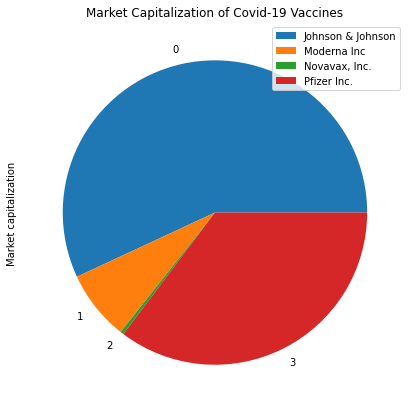

In [61]:
plt = df.plot.pie(y='Market capitalization', figsize=(7,7))
plt.set_title('Market Capitalization of Covid-19 Vaccines Stock')
plt.legend(labels = df['Company Name'])


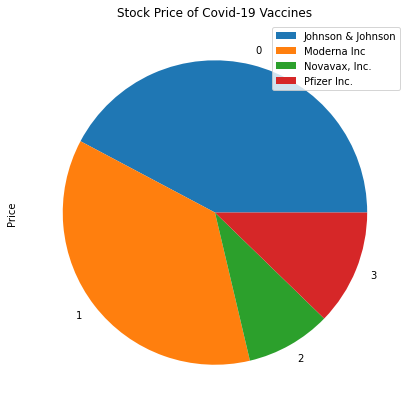

In [67]:
plt = df.plot.pie(y='Price', figsize=(7,7))
plt.set_title('Stock Price of Covid-19 Vaccines')
plt.legend(labels = df['Company Name'])